# Forecasting Stock Data Using LSTM

In [6]:
import numpy as np 
import pandas as pd 
import os
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

amd_data = pd.read_csv('data/AMD.csv')
aapl_data = pd.read_csv('data/AAPL.csv')

### Exploratory Data Analysis

#### AMD

In [7]:
#head of AMD time series data
amd_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [8]:
#descriptive statistics of AMD time series data
amd_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,1.009800e+04
mean,10.889136,11.462153,10.958702,11.210802,11.210802,1.451625e+07
std,8.615288,8.475056,8.077069,8.283645,8.283645,2.396199e+07
min,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,4.562500,5.062500,4.812500,4.937500,4.937500,1.098600e+06
50%,9.062500,9.280625,8.875000,9.062500,9.062500,5.518500e+06
75%,14.747500,15.000000,14.435625,14.707500,14.707500,1.742722e+07
max,58.439999,59.270000,57.509998,58.900002,58.900002,3.250584e+08


In [9]:
#all columns in AMD timeseries data
amd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10098 non-null  object 
 1   Open       10098 non-null  float64
 2   High       10098 non-null  float64
 3   Low        10098 non-null  float64
 4   Close      10098 non-null  float64
 5   Adj Close  10098 non-null  float64
 6   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 552.4+ KB


In [10]:
#checking missing and duplicates data
print('missing data : ')
print(amd_data.isna().sum())

print('\nduplicated data : ', amd_data.duplicated().sum())


missing data : 
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

duplicated data :  0


In the AMD stock prices data, there're neither duplicates nor missing values.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Closed Price (USD)')

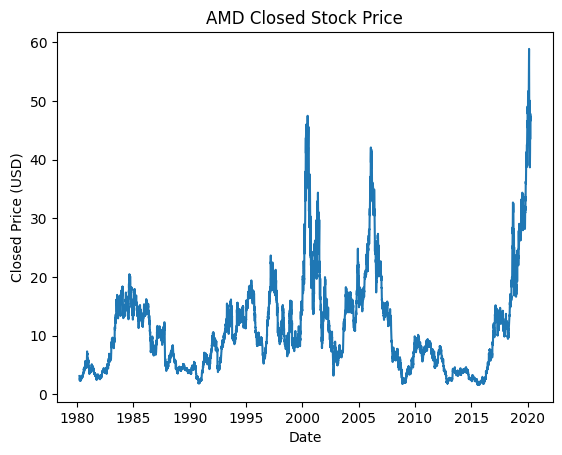

In [11]:
#changing date columns to date datatype
amd_data.Date = pd.to_datetime(amd_data.Date)

#line chart of AMD time series data
ax = sns.lineplot(data = amd_data, x = 'Date', y = 'Close')
ax.set_title('AMD Closed Stock Price')
ax.set_ylabel('Closed Price (USD)')

Based on the line chart above, the AMD stock price experiences a long term increase. In 1980, the stock price was under 10 USD and it's rising over 50 USD today.

#### AAPL (Apple)

In [12]:
#head of Apple time series data
aapl_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [13]:
#columns of Apple time series data
aapl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


In [14]:
#checking missing and duplicates data
print('missing data : ')
print(aapl_data.isna().sum())

print('\nduplicated data : ', aapl_data.duplicated().sum())


missing data : 
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

duplicated data :  0


Based on the table above, there're no missing values on the Apple's stock prices data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Closed Price (USD)')

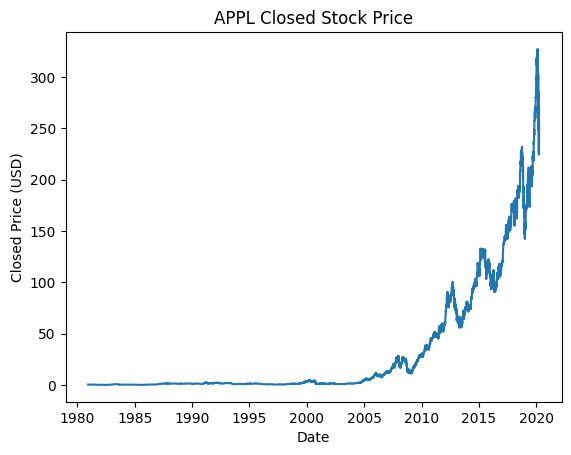

In [15]:
#changing date columns to date datatype
aapl_data.Date = pd.to_datetime(aapl_data.Date)

#line chart Apple time series data
ax = sns.lineplot(data = aapl_data, x = 'Date', y = 'Close')
ax.set_title('APPL Closed Stock Price')
ax.set_ylabel('Closed Price (USD)')

Based on this line chart, the Apple stock price has risen significantly over 40 years. In 2020, the stock price is over 300 USD.

#### AMD VS AAPL

Text(0, 0.5, 'Closed Price')

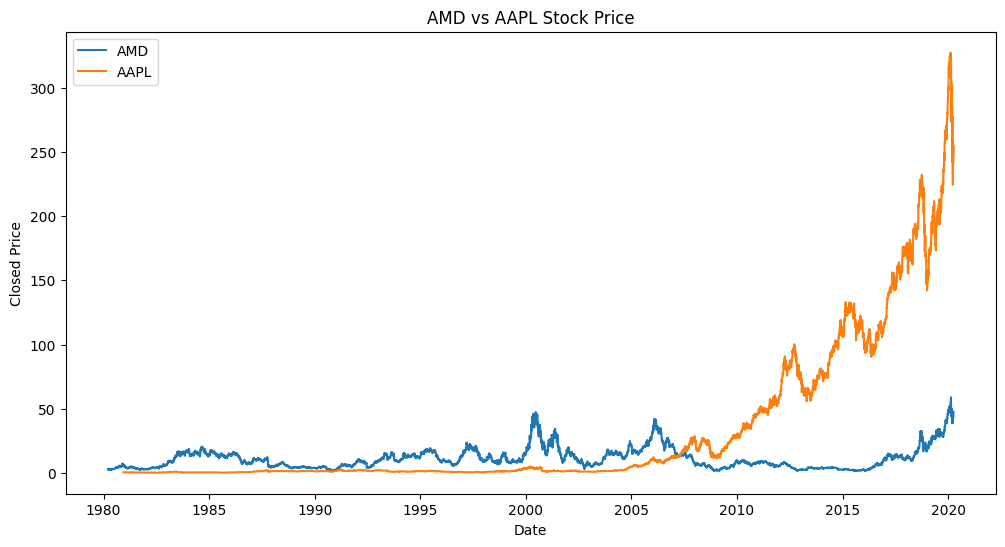

In [16]:
fig = plt.figure(figsize = (12,6))
plt.plot(amd_data.Date, amd_data.Close, label = 'AMD')
plt.plot(aapl_data.Date, aapl_data.Close, label = 'AAPL')
plt.legend()
plt.title('AMD vs AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Closed Price')

Before 2007, the Apple stock price was under AMD. Then, the Apple stock price increased and surpassed AMD after first launching of Iphone by Steve Jobs. 

### Data Preprocessing

In [17]:
def preprocess_data(data):
    data = data.set_index('Date')
    data = data[['Close']]
    return data

amd_data = preprocess_data(amd_data.copy())
aapl_data = preprocess_data(aapl_data.copy())

In [18]:
#splits data into training, validation and test
def split_data(data):
    train_pivot = round(len(data)*0.80)
    test_pivot = round(len(data)*0.9)
    return data.iloc[:train_pivot], data.iloc[train_pivot:test_pivot], data.iloc[test_pivot:]

train_amd , validation_amd, test_amd = split_data(amd_data)
train_aapl , validation_aapl, test_aapl = split_data(aapl_data)

In [19]:
window = 5

#splits data based on 1 horizon and 5 windows
def create_dataset(dataset, window):
    x, y = [], []
    horizon = 1
    
    for i in range(len(dataset)-window):
        feature = dataset[i:i+window]
        target = dataset[i+window:i+window+horizon]
        x.append(feature)
        y.append(target)
        
    return np.array(x), np.array(y)
    

x_train_amd, y_train_amd = create_dataset(train_amd,window)
x_val_amd, y_val_amd = create_dataset(validation_amd,window)
x_test_amd, y_test_amd = create_dataset(test_amd,window)


x_train_aapl, y_train_aapl = create_dataset(train_aapl,window)
x_val_aapl, y_val_aapl = create_dataset(validation_aapl,window)
x_test_aapl, y_test_aapl = create_dataset(test_aapl,window)

 ###  Architecture 1
 
 Build LSTM architecture consists :
 - 1 LSTM layer (50 units) with ReLu activation layer
 - 1 final layer with ADAM optimizer

#### AMD

In [20]:
model_1 = Sequential([
    LSTM(50, input_shape = (5,1), activation = 'relu'),
    Dense(1)
])

model_1.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])
model_1.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#fitting model
history_1 = model_1.fit(x_train_amd,y_train_amd, validation_data = (x_val_amd, y_val_amd), epochs = 30)

Epoch 1/30
 66/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62.0138 - mae: 6.0146 

I0000 00:00:1726111125.929651     227 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 25.6745 - mae: 2.9872 - val_loss: 0.0519 - val_mae: 0.1864
Epoch 2/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4521 - mae: 0.4372 - val_loss: 0.0367 - val_mae: 0.1321
Epoch 3/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3759 - mae: 0.3958 - val_loss: 0.0270 - val_mae: 0.1205
Epoch 4/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3998 - mae: 0.3981 - val_loss: 0.0244 - val_mae: 0.1112
Epoch 5/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3568 - mae: 0.3731 - val_loss: 0.0334 - val_mae: 0.1327
Epoch 6/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3506 - mae: 0.3704 - val_loss: 0.0217 - val_mae: 0.1020
Epoch 7/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3294 - mae: 0.3583 - val_loss: 0.0214 - val_mae: 0.1071
Epoch 8/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3101 - mae: 0.3378 - val_loss: 0.0304 - val_mae: 0.1255
Epoch 9/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.314

#### AAPL

In [22]:
model_2 = Sequential([
    LSTM(50, input_shape = (5,1), activation = 'relu'),
    Dense(1)
])

model_2.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history_2 = model_2.fit(x_train_aapl,y_train_aapl, validation_data = (x_val_aapl, y_val_aapl), epochs = 30)

Epoch 1/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 31.3689 - mae: 1.9594 - val_loss: 5.7646 - val_mae: 1.8386
Epoch 2/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2554 - mae: 0.2160 - val_loss: 17.3396 - val_mae: 3.5718
Epoch 3/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3472 - mae: 0.2415 - val_loss: 12.5119 - val_mae: 2.9143
Epoch 4/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2957 - mae: 0.2139 - val_loss: 4.6475 - val_mae: 1.6500
Epoch 5/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2394 - mae: 0.1995 - val_loss: 4.4341 - val_mae: 1.6122
Epoch 6/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2052 - mae: 0.1905 - val_loss: 4.2664 - val_mae: 1.5793
Epoch 7/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1972 - mae: 0.1845 - val_loss: 6.6219 - val_mae: 2.0368
Epoch 8/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2367 - mae: 0.2070 - val_loss: 4.1462 - val_mae: 1.5657
Epoch 9/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 

### Hyperparameter Tuning

To improve model performance, I performed hyperparameter tuning. Hyperparameter tuning is a method that works by finding the most optimal hyperparameter model automatically. Also, it helps generalizing models parameter complexity to overcome either overfitting or underfitting on model performance. 

#### AMD

In [20]:
# tuning for 1st model (AMD)

def objective(trial):
    model = Sequential()
    
    lstm_layer = trial.suggest_int('lstm_layers', 1, 4)
 
    for i in range(lstm_layer):
        lstm_unit = trial.suggest_int(f'lstm_unit_{i+1}', 1, 100)
        
        if i == 0:
            model.add(LSTM(lstm_unit, return_sequences=(lstm_layer > 1), input_shape=(x_train_amd.shape[1], x_train_amd.shape[2]),activation = 'relu'))
        elif i == lstm_layer - 1:
            model.add(LSTM(lstm_unit, activation='relu'))
        else:
            model.add(LSTM(lstm_unit, return_sequences=True, activation='relu'))
        
        dropout_pct = trial.suggest_float('dropout_pct', 0.0, 0.5)
        model.add(Dropout(dropout_pct))
    
    dense_layer = trial.suggest_int('dense_layers', 1, 4)
    
    for i in range(dense_layer):
        dense_unit = trial.suggest_int(f'dense_unit_{i+1}', 1, 100)
        model.add(Dense(dense_unit, activation='relu'))
    
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    
    model.fit(x_train_amd, y_train_amd, validation_data=(x_val_amd, y_val_amd), epochs=30)
    
    mae_score = model.evaluate(x_val_amd, y_val_amd, verbose= 0)[1]
    
    return mae_score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

[I 2024-07-02 06:02:37,507] A new study created in memory with name: no-name-23dadfae-50c5-4b7b-8d36-5c52fbd1a732
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 56.1428 - mae: 4.5982 - val_loss: 0.4491 - val_mae: 0.5963
Epoch 2/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 3.1242 - mae: 1.1767 - val_loss: 0.3143 - val_mae: 0.4609
Epoch 3/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.4871 - mae: 1.0434 - val_loss: 0.3580 - val_mae: 0.4946
Epoch 4/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.3364 - mae: 1.0298 - val_loss: 0.2290 - val_mae: 0.4086
Epoch 5/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.1530 - mae: 0.9871 - val_loss: 0.1884 - val_mae: 0.3594
Epoch 6/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.2829 - mae: 1.0107 - val_loss: 0.2005 - val_mae: 0.3649
Epoch 7/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.9316 - mae: 0.9301 - val_loss: 0.4296 - val_mae: 0.5929
Epoch 8/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.7190 - mae: 0.8620 - val_loss: 0.0987 - val_mae: 0.2524
Epoch 9/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 14m

[I 2024-07-02 06:04:32,776] Trial 0 finished with value: 0.26889389753341675 and parameters: {'lstm_layers': 4, 'lstm_unit_1': 36, 'dropout_pct': 0.09628756352104606, 'lstm_unit_2': 75, 'lstm_unit_3': 51, 'lstm_unit_4': 77, 'dense_layers': 1, 'dense_unit_1': 10}. Best is trial 0 with value: 0.26889389753341675.


Epoch 1/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 178.5278 - mae: 11.2148 - val_loss: 10.9544 - val_mae: 3.0747
Epoch 2/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 174.1000 - mae: 11.0091 - val_loss: 9.4954 - val_mae: 2.8275
Epoch 3/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 163.1276 - mae: 10.5846 - val_loss: 8.1691 - val_mae: 2.5823
Epoch 4/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 163.3622 - mae: 10.4944 - val_loss: 6.9760 - val_mae: 2.3399
Epoch 5/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 154.7161 - mae: 10.1639 - val_loss: 5.9049 - val_mae: 2.0986
Epoch 6/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 151.5986 - mae: 9.9348 - val_loss: 4.9613 - val_mae: 1.8603
Epoch 7/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 148.5075 - mae: 9.7571 - val_loss: 4.1358 - val_mae: 1.6238
Epoch 8/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 142.4928 - mae: 9.5198 - val_loss: 3.4274 - val_mae: 1.4050
Epoch 9/30
253/253 ━━━━━━

[I 2024-07-02 06:06:24,971] Trial 1 finished with value: 3.507747173309326 and parameters: {'lstm_layers': 4, 'lstm_unit_1': 94, 'dropout_pct': 0.4965357205698665, 'lstm_unit_2': 49, 'lstm_unit_3': 2, 'lstm_unit_4': 1, 'dense_layers': 4, 'dense_unit_1': 45, 'dense_unit_2': 21, 'dense_unit_3': 29, 'dense_unit_4': 39}. Best is trial 0 with value: 0.26889389753341675.


Epoch 1/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 47.1530 - mae: 4.2969 - val_loss: 0.9717 - val_mae: 0.7814
Epoch 2/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 4.2904 - mae: 1.3569 - val_loss: 0.9724 - val_mae: 0.8084
Epoch 3/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.2554 - mae: 1.1821 - val_loss: 1.0294 - val_mae: 0.8294
Epoch 4/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.7631 - mae: 1.0787 - val_loss: 0.8796 - val_mae: 0.7822
Epoch 5/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.4091 - mae: 1.0215 - val_loss: 0.9607 - val_mae: 0.8075
Epoch 6/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.7026 - mae: 1.0768 - val_loss: 0.9233 - val_mae: 0.7956
Epoch 7/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.1817 - mae: 0.9575 - val_loss: 0.9818 - val_mae: 0.8155
Epoch 8/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.6595 - mae: 0.8625 - val_loss: 0.9419 - val_mae: 0.8023
Epoch 9/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10m

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 1.5311 - mae: 0.8133 - val_loss: 0.5063 - val_mae: 0.5622
Epoch 14/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.5440 - mae: 0.8046 - val_loss: 0.3645 - val_mae: 0.4580
Epoch 15/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 2.2085 - mae: 0.9659 - val_loss: 0.1974 - val_mae: 0.3490
Epoch 16/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 1.3456 - mae: 0.7734 - val_loss: 0.2307 - val_mae: 0.3511
Epoch 17/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.3071 - mae: 0.7387 - val_loss: 0.2366 - val_mae: 0.3845
Epoch 18/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.6566 - mae: 0.8308 - val_loss: 0.2500 - val_mae: 0.3976
Epoch 19/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.1112 - mae: 0.7046 - val_loss: 0.1885 - val_mae: 0.3010
Epoch 20/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.3377 - mae: 0.7478 - val_loss: 0.2033 - val_mae: 0.3890
Epoch 21/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/ste

[I 2024-07-02 06:10:04,777] Trial 3 finished with value: 0.9075574278831482 and parameters: {'lstm_layers': 4, 'lstm_unit_1': 10, 'dropout_pct': 0.23668898266026117, 'lstm_unit_2': 87, 'lstm_unit_3': 48, 'lstm_unit_4': 99, 'dense_layers': 4, 'dense_unit_1': 18, 'dense_unit_2': 61, 'dense_unit_3': 40, 'dense_unit_4': 8}. Best is trial 0 with value: 0.26889389753341675.


Epoch 1/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 49.6691 - mae: 4.0785 - val_loss: 0.0781 - val_mae: 0.1945
Epoch 2/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.5775 - mae: 0.7896 - val_loss: 0.1018 - val_mae: 0.2624
Epoch 3/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 1.1407 - mae: 0.6855 - val_loss: 0.0488 - val_mae: 0.1670
Epoch 4/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.0160 - mae: 0.6417 - val_loss: 0.0814 - val_mae: 0.2325
Epoch 5/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.8662 - mae: 0.5982 - val_loss: 0.0825 - val_mae: 0.2227
Epoch 6/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.0531 - mae: 0.6613 - val_loss: 0.0462 - val_mae: 0.1651
Epoch 7/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.7527 - mae: 0.5646 - val_loss: 0.0434 - val_mae: 0.1563
Epoch 8/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.7121 - mae: 0.5441 - val_loss: 0.0487 - val_mae: 0.1675
Epoch 9/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15m

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.4269 - mae: 0.4202 - val_loss: 0.0219 - val_mae: 0.1115
Epoch 29/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.4522 - mae: 0.4217 - val_loss: 0.0729 - val_mae: 0.2277
Epoch 30/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.4292 - mae: 0.4126 - val_loss: 0.0207 - val_mae: 0.1035


[I 2024-07-02 06:12:07,588] Trial 4 finished with value: 0.10349943488836288 and parameters: {'lstm_layers': 4, 'lstm_unit_1': 54, 'dropout_pct': 0.003592374270444898, 'lstm_unit_2': 74, 'lstm_unit_3': 53, 'lstm_unit_4': 66, 'dense_layers': 1, 'dense_unit_1': 27}. Best is trial 4 with value: 0.10349943488836288.


In [21]:
#hyperparameter tuning
print("Best trial:")
trial = study.best_trial

print("  MAE: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Best trial:
  MAE:  0.10349943488836288
  Params: 
    lstm_layers: 4
    lstm_unit_1: 54
    dropout_pct: 0.003592374270444898
    lstm_unit_2: 74
    lstm_unit_3: 53
    lstm_unit_4: 66
    dense_layers: 1
    dense_unit_1: 27


In [24]:
#hyperparameter tuning model for AMD time series data
model_3 = Sequential([
    LSTM(54, input_shape = (5,1), activation = 'relu',return_sequences = True),
    Dropout(0.003592374270444898),
    LSTM(74, activation = 'relu',return_sequences = True),
    Dropout(0.003592374270444898),
    LSTM(53, activation = 'relu',return_sequences = True),
    Dropout(0.003592374270444898),
    LSTM(66, activation = 'relu'),
    Dropout(0.003592374270444898),
    Dense(27, activation = 'relu'),
    Dense(1)
])

model_3.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 5, 54)          │        12,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 54)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 5, 74)          │        38,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 74)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 5, 53)          │        27,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 53)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 66)             │        31,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 27)             │         1,809 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            28 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,933 (433.33 KB)

 Trainable params: 110,933 (433.33 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#fitting model 
history_3 = model_3.fit(x_train_amd, y_train_amd, validation_data=(x_val_amd, y_val_amd), epochs=30)

Epoch 1/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 33s 63ms/step - loss: 56.6264 - mae: 4.6044 - val_loss: 0.0948 - val_mae: 0.2411
Epoch 2/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3280 - mae: 0.7177 - val_loss: 0.1182 - val_mae: 0.2873
Epoch 3/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3557 - mae: 0.7447 - val_loss: 0.1245 - val_mae: 0.2891
Epoch 4/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2529 - mae: 0.7163 - val_loss: 0.1422 - val_mae: 0.3076
Epoch 5/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2970 - mae: 0.7326 - val_loss: 0.1478 - val_mae: 0.3136
Epoch 6/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1345 - mae: 0.6963 - val_loss: 0.1856 - val_mae: 0.3646
Epoch 7/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0706 - mae: 0.6623 - val_loss: 0.0790 - val_mae: 0.2282
Epoch 8/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8169 - mae: 0.5903 - val_loss: 0.0719 - val_mae: 0.2177
Epoch 9/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

#### AAPL

In [30]:
# hyperparameter tuning for Apple time series model 

import optuna

def objective_2(trial):
    model = Sequential()
    
    lstm_layer = trial.suggest_int('lstm_layers', 1, 4)
    
    for i in range(lstm_layer):
        lstm_unit = trial.suggest_int(f'lstm_unit_{i+1}', 1, 100)
        
        if i == 0:
            model.add(LSTM(lstm_unit, return_sequences=(lstm_layer > 1), input_shape=(x_train_amd.shape[1], x_train_amd.shape[2]),activation = 'relu'))
        elif i == lstm_layer - 1:
            model.add(LSTM(lstm_unit, activation='relu'))
        else:
            model.add(LSTM(lstm_unit, return_sequences=True, activation='relu'))
        
        dropout_pct = trial.suggest_float('dropout_pct', 0.0, 0.5)
        model.add(Dropout(dropout_pct))

    dense_layer = trial.suggest_int('dense_layers', 1, 4)
    
    for i in range(dense_layer):
        dense_unit = trial.suggest_int(f'dense_unit_{i+1}', 1, 100)
        model.add(Dense(dense_unit, activation='relu'))
    
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    
    model.fit(x_train_aapl, y_train_aapl, validation_data=(x_val_aapl, y_val_aapl), epochs=30)
    

    mae_score = model.evaluate(x_val_aapl, y_val_aapl, verbose= 0)[1]
    
    return mae_score

study_2 = optuna.create_study(direction='minimize')
study_2.optimize(objective_2, n_trials=5)

[I 2024-07-02 06:49:21,322] A new study created in memory with name: no-name-8debbe09-8875-43a3-8634-6609ef5cec9b


Epoch 1/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 126.2054 - mae: 4.4264 - val_loss: 2920.4341 - val_mae: 52.4887
Epoch 2/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 19.8341 - mae: 1.9022 - val_loss: 3835.3013 - val_mae: 60.0822
Epoch 3/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 14.5873 - mae: 1.6512 - val_loss: 3146.2717 - val_mae: 54.5111
Epoch 4/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 12.8205 - mae: 1.5946 - val_loss: 3245.3777 - val_mae: 55.1114
Epoch 5/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 11.9677 - mae: 1.4608 - val_loss: 2950.6001 - val_mae: 52.4743
Epoch 6/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 10.3342 - mae: 1.3732 - val_loss: 3079.7947 - val_mae: 53.7334
Epoch 7/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 6.8221 - mae: 1.2155 - val_loss: 2899.5259 - val_mae: 52.0521
Epoch 8/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 6.4231 - mae: 1.1471 - val_loss: 3110.1284 - val_mae: 53.9922
Epoch 9/

[I 2024-07-02 06:51:30,580] Trial 0 finished with value: 53.92573547363281 and parameters: {'lstm_layers': 4, 'lstm_unit_1': 61, 'dropout_pct': 0.426536080948189, 'lstm_unit_2': 87, 'lstm_unit_3': 65, 'lstm_unit_4': 48, 'dense_layers': 3, 'dense_unit_1': 20, 'dense_unit_2': 20, 'dense_unit_3': 100}. Best is trial 0 with value: 53.92573547363281.


Epoch 1/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 92.5489 - mae: 3.7005 - val_loss: 3250.2266 - val_mae: 54.9270
Epoch 2/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 22.7950 - mae: 1.8285 - val_loss: 2575.2373 - val_mae: 48.7613
Epoch 3/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 16.2835 - mae: 1.5009 - val_loss: 3855.0789 - val_mae: 60.2741
Epoch 4/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 14.2949 - mae: 1.4049 - val_loss: 4956.2026 - val_mae: 68.5285
Epoch 5/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.8739 - mae: 1.2453 - val_loss: 4700.9126 - val_mae: 66.7198
Epoch 6/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 8.5140 - mae: 1.0981 - val_loss: 3446.2158 - val_mae: 57.2270
Epoch 7/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.3439 - mae: 0.9797 - val_loss: 4730.0249 - val_mae: 67.0167
Epoch 8/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.9440 - mae: 0.9213 - val_loss: 4583.6509 - val_mae: 65.9284
Epoch 9/30
248/248 

[I 2024-07-02 06:52:31,244] Trial 1 finished with value: 64.62190246582031 and parameters: {'lstm_layers': 2, 'lstm_unit_1': 17, 'dropout_pct': 0.47512078600423696, 'lstm_unit_2': 18, 'dense_layers': 3, 'dense_unit_1': 36, 'dense_unit_2': 80, 'dense_unit_3': 7}. Best is trial 0 with value: 53.92573547363281.


Epoch 1/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 71.2681 - mae: 3.0461 - val_loss: 1421.2581 - val_mae: 36.6672
Epoch 2/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.3577 - mae: 1.1216 - val_loss: 2620.2776 - val_mae: 49.7852
Epoch 3/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.9074 - mae: 0.8212 - val_loss: 2827.9377 - val_mae: 51.7872
Epoch 4/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.7297 - mae: 0.7917 - val_loss: 2156.0125 - val_mae: 45.1705
Epoch 5/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.2774 - mae: 0.7483 - val_loss: 2275.1443 - val_mae: 46.2406
Epoch 6/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.9199 - mae: 0.8217 - val_loss: 2791.7949 - val_mae: 51.3801
Epoch 7/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.9697 - mae: 0.7155 - val_loss: 2830.7100 - val_mae: 51.7895
Epoch 8/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.6417 - mae: 0.7916 - val_loss: 2696.0015 - val_mae: 50.5518
Epoch 9/30
248/248 ━━━

[I 2024-07-02 06:53:45,523] Trial 2 finished with value: 51.397483825683594 and parameters: {'lstm_layers': 2, 'lstm_unit_1': 72, 'dropout_pct': 0.38618019647861707, 'lstm_unit_2': 54, 'dense_layers': 4, 'dense_unit_1': 91, 'dense_unit_2': 89, 'dense_unit_3': 39, 'dense_unit_4': 61}. Best is trial 2 with value: 51.397483825683594.


Epoch 1/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 96.3873 - mae: 3.6061 - val_loss: 602.6222 - val_mae: 23.8039
Epoch 2/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.2499 - mae: 0.8297 - val_loss: 535.3092 - val_mae: 22.4732
Epoch 3/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.7681 - mae: 0.7130 - val_loss: 335.5362 - val_mae: 17.6155
Epoch 4/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.6472 - mae: 0.6081 - val_loss: 531.1934 - val_mae: 22.3484
Epoch 5/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.5631 - mae: 0.6161 - val_loss: 694.3093 - val_mae: 25.5841
Epoch 6/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.2213 - mae: 0.5652 - val_loss: 367.2120 - val_mae: 18.5600
Epoch 7/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.2889 - mae: 0.5628 - val_loss: 294.5670 - val_mae: 16.6056
Epoch 8/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.4336 - mae: 0.5312 - val_loss: 447.4608 - val_mae: 20.4124
Epoch 9/30
248/248 ━━━━━━━━━━━

[I 2024-07-02 06:54:51,549] Trial 3 finished with value: 26.93251609802246 and parameters: {'lstm_layers': 2, 'lstm_unit_1': 44, 'dropout_pct': 0.17625104440204847, 'lstm_unit_2': 11, 'dense_layers': 3, 'dense_unit_1': 94, 'dense_unit_2': 18, 'dense_unit_3': 5}. Best is trial 3 with value: 26.93251609802246.


Epoch 1/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 90.7497 - mae: 3.7808 - val_loss: 4172.8311 - val_mae: 62.8569
Epoch 2/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 16.6151 - mae: 1.5944 - val_loss: 2326.7744 - val_mae: 47.0939
Epoch 3/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 11.3911 - mae: 1.3421 - val_loss: 3511.2935 - val_mae: 57.5749
Epoch 4/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 7.9855 - mae: 1.1567 - val_loss: 4122.5298 - val_mae: 62.3377
Epoch 5/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 7.8640 - mae: 1.1244 - val_loss: 3846.2263 - val_mae: 60.0708
Epoch 6/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 6.1084 - mae: 1.0000 - val_loss: 3790.2810 - val_mae: 59.5457
Epoch 7/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 4.8863 - mae: 0.9512 - val_loss: 3759.2480 - val_mae: 59.3260
Epoch 8/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 5.3550 - mae: 0.9614 - val_loss: 3724.3528 - val_mae: 59.0581
Epoch 9/30
2

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
##hyperparameter tuning
print("Best trial:")
trial = study_2.best_trial

print("|  MAE: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Best trial:
|  MAE:  26.93251609802246
  Params: 
    lstm_layers: 2
    lstm_unit_1: 44
    dropout_pct: 0.17625104440204847
    lstm_unit_2: 11
    dense_layers: 3
    dense_unit_1: 94
    dense_unit_2: 18
    dense_unit_3: 5


In [26]:
#build model for Apple time series data after hyperparameter tuning
model_4 = Sequential([
    LSTM(44, input_shape = (5,1), activation = 'relu',return_sequences = True),
    Dropout(0.17625104440204847),
    LSTM(11, activation = 'relu'),
    Dropout(0.17625104440204847),
    Dense(94, activation = 'relu'),
    Dense(18, activation = 'relu'),
    Dense(5, activation = 'relu'),
    Dense(1)
])

model_4.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 5, 44)          │         8,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 44)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 11)             │         2,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 94)             │         1,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 18)             │         1,710 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │            95 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,499 (52.73 KB)

 Trainable params: 13,499 (52.73 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#fitting model 
history_4 = model_4.fit(x_train_aapl, y_train_aapl, validation_data=(x_val_aapl, y_val_aapl), epochs=30)

Epoch 1/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - loss: 79.5834 - mae: 3.3341 - val_loss: 309.0532 - val_mae: 16.9433
Epoch 2/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2111 - mae: 0.6713 - val_loss: 298.1778 - val_mae: 16.5372
Epoch 3/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2768 - mae: 0.5652 - val_loss: 253.7708 - val_mae: 15.3794
Epoch 4/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5156 - mae: 0.5724 - val_loss: 236.9184 - val_mae: 14.8179
Epoch 5/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3680 - mae: 0.5314 - val_loss: 428.9388 - val_mae: 20.0083
Epoch 6/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5417 - mae: 0.4686 - val_loss: 348.0281 - val_mae: 18.0244
Epoch 7/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8940 - mae: 0.5050 - val_loss: 441.9188 - val_mae: 20.2538
Epoch 8/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9746 - mae: 0.5130 - val_loss: 409.7922 - val_mae: 19.5164
Epoch 9/30
248/248 ━━━━━━━━━━

### Model Evaluation

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

model_dict = {
    'Name': ['Model AMD (initial)', 'Model AMD (hyperparameter tuning)','Model AAPL (initial)','Model AAPL (hyperparameter tuning)'],
    'RMSE' : [],
    'MAE':[],
    'MAPE':[]
}

amd_mods = [model_1,model_3]
aapl_mods = [model_2, model_4]

#evaluate AMD LSTM model
for i in range(0,2):
    y_pred = amd_mods[i].predict(x_test_amd).ravel()
    model_dict['RMSE'].append(mean_squared_error(y_pred,y_test_amd.ravel(),squared = False))
    model_dict['MAPE'].append(mean_absolute_percentage_error(y_pred,y_test_amd.ravel()))
    model_dict['MAE'].append(mean_absolute_error(y_pred,y_test_amd.ravel()))

#evaluate AAPL LSTM model
for i in range(0,2):
    y_pred = aapl_mods[i].predict(x_test_aapl).ravel()
    model_dict['RMSE'].append(mean_squared_error(y_pred, y_test_aapl.ravel(),squared = False))
    model_dict['MAPE'].append(mean_absolute_percentage_error(y_pred, y_test_aapl.ravel()))
    model_dict['MAE'].append(mean_absolute_error(y_pred, y_test_aapl.ravel()))
    
result = pd.DataFrame(model_dict)
result 

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step 


,Name,RMSE,MAE,MAPE
0,Model AMD (initial),0.899914,0.535086,0.028241
1,Model AMD (hyperparameter tuning),1.600604,1.001889,0.049669
2,Model AAPL (initial),4.851170,3.568457,0.019347
3,Model AAPL (hyperparameter tuning),40.178088,38.297736,0.276960


Based on the table above, both of initial LSTM models are better rather than tuned hyperparameter models. All of error metrics, RMSE, MAE , MAPE increased for both AMD and AAPL. For AMD stock prices data, the RMSE increased from 0.89 to 1.6, MAE increased from 0.53 to 1 and MAPE increased from 2.82% to 4.97%. For Apple stock prices data, the RMSE increased exponentially from 4.85 to 40.17, MAE increased from 3.56 to 38.30 and MAPE increased from 1.93% to 27,7%.

### Depth analysis

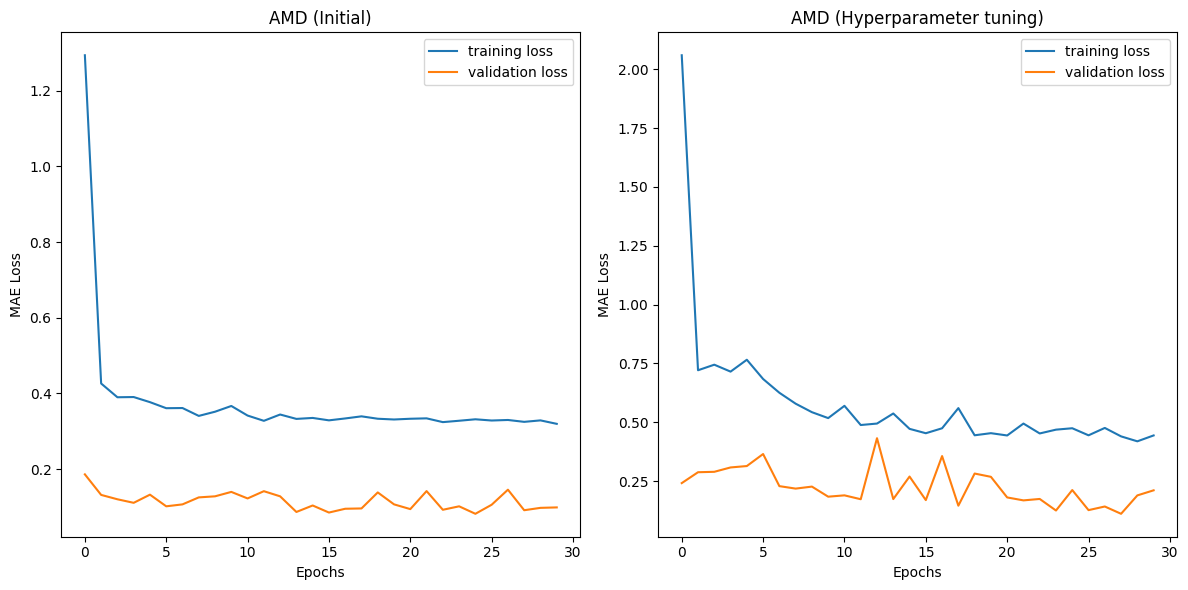

In [29]:
def show_history_plot(model_hist1, model_hist2, type_data):
    fig,axes = plt.subplots(1,2,figsize = (12,6))
    hist_dict = {
        'Name':['Initial', 'Hyperparameter tuning'],
        'History':[model_hist1,model_hist2]
    }
    
    for i in range(2):
        model_sample = hist_dict['History'][i]
        loss = model_sample.history['mae']
        type_model = hist_dict['Name'][i]
        val_loss = model_sample.history['val_mae']
        axes[i].plot(range(len(loss)), loss, label = 'training loss')
        axes[i].plot(range(len(loss)), val_loss, label = 'validation loss')
        axes[i].set_title(f'{type_data} ({type_model})')
        axes[i].set_xlabel('Epochs')
        axes[i].set_ylabel('MAE Loss')
        axes[i].legend()
    
    fig.tight_layout()
    
show_history_plot(history_1,history_3, 'AMD')
        

Based on the graph above, the training loss model for AMD data before hyperparameter tuning experienced a sharp decline at the beginning of the epoch, but afterwards it was relatively stable and there was no significant change in fluctuation. For validation loss, there is no significant fluctuation and relatively stable. 

Compared to the model after hyperparameter tuning, the training loss of the model also decreases sharply at the beginning and then drops slowly. For validation loss, the trend is more volatile. 

**Indication:**

The performance of the AMD model after hyperparameter tuning is worse than the initial AMD model, this is because the model after hyperparameter tuning is too complex in structure and cannot handle the complexity of the AMD stock data. This can be seen in the fluctuations that occur in validation loss.

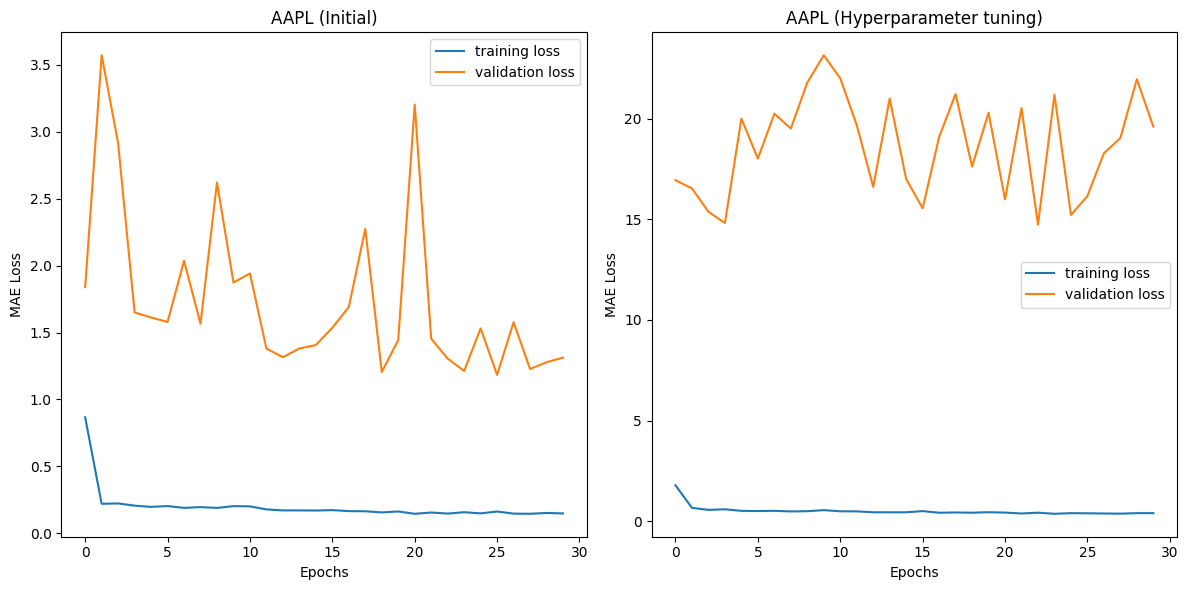

In [30]:
show_history_plot(history_2,history_4, 'AAPL')

The error fluctuation in the initial model looks quite stable compared to the model after hyperparameter tuning. The error fluctuation of the model after hyperparameter tuning is not stable enough and the margin is very high at each epoch. 

**Indication :**

The performance of the AAPL model after hyperparameter tuning is worse than the initial model, this is because the model after hyperparameter tuning the structure is still 
too simple and cannot handle the complexity of stock data on different data such as those in the validation data. 

## Prediction vs Initial Data Comparison

In [31]:
def get_final_prediction(model, data, index):
    prediction_final = model.predict(data, verbose = None)
    prediction_final = pd.Series(prediction_final.ravel(), index = index )
    return prediction_final



appl_final = [np.concatenate([x_val_aapl,x_test_aapl],axis = 0),np.concatenate([validation_aapl.index[5:],test_aapl.index[5:]],axis = 0)]
amd_final = [np.concatenate([x_val_amd,x_test_amd], axis = 0),np.concatenate([validation_amd.index[5:],test_amd.index[5:]], axis = 0 )]

appl_prediction_final = get_final_prediction(model_2,appl_final[0],appl_final[1])
amd_prediction_final = get_final_prediction(model_1,amd_final[0],amd_final[1])

In [32]:
amd_init, aapl_init = [amd_data.loc[amd_final[1]].Close , aapl_data.loc[appl_final[1]].Close]

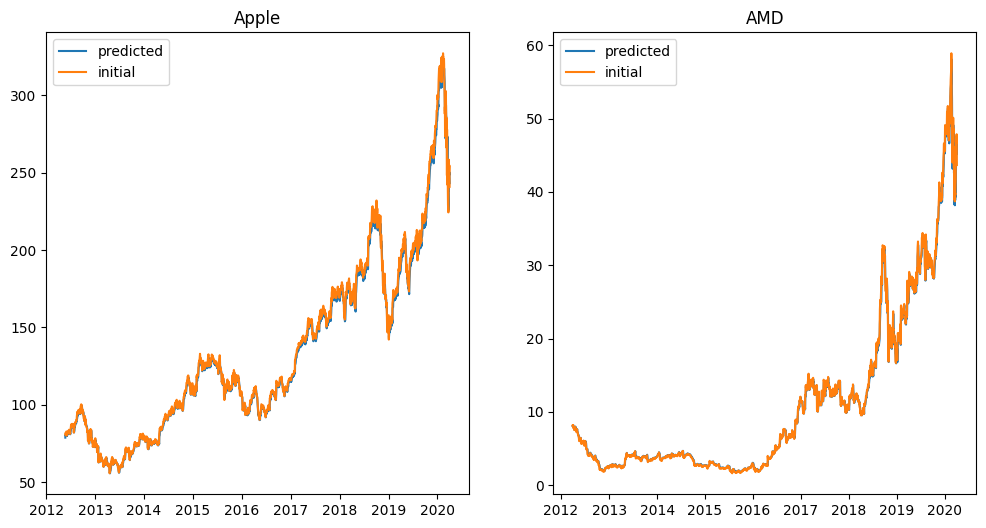

In [33]:
def set_plot(axes, data_init, data_predicted, title):
    axes.plot(data_predicted.index, data_predicted.values, label = 'predicted')
    axes.plot(data_init.index, data_init.values, label = 'initial')
    axes.set_title(title)
    axes.legend()
    
fig,axes = plt.subplots(1,2,figsize = (12,6))

set_plot(axes[0],aapl_init,appl_prediction_final, 'Apple')
set_plot(axes[1],amd_init,amd_prediction_final, 'AMD')


## Deploy Model 

In [34]:
model_1.save('model/amd_model.keras')
model_2.save('model/aapl_model.keras')